# Getting input
saving Adjacency matrix with weight of edges

In [1]:
graph = []
n = int(input("Number of cities: "))
x = []
y = []
s = list(map(float, input().split()))
for i in range(0, len(s)-2, 3):
    graph.append([-1 for i in range(n)])
    a, x_in, y_in = s[i], s[i+1], s[i+2]
    x.append(x_in)
    y.append(y_in)
print(a, len(x), len(y))

for i in range(n):
    for j in range(n):
        dis = ((x[i] - x[j])**2 + (y[i] - y[j])**2) ** 0.5
        graph[i][j] = dis
        graph[j][i] = dis

#sample view
print("Sample ###############")
for i in range(4):
    for j in range(4):
        print(graph[i][j], end=' ')
    print('\n')


Number of cities: 1002
1 1150 4000 2 1050 2750 3 1150 2250 4 1250 2050 5 1350 2350 6 1050 1550 7 3350 1700 8 3450 1450 9 3550 1600 10 3950 1700 11 4050 2000 12 4050 2150 13 4250 1650 14 4150 1500 15 4450 1450 16 4400 1700 17 4600 1850 18 4900 1550 19 5100 1550 20 5350 1450 21 4950 1700 22 4850 1900 23 4900 2050 24 5000 2150 25 5100 2050 26 5400 2050 27 5750 2000 28 5900 2050 29 5600 2250 30 5400 2300 31 5250 2250 32 5000 2350 33 5000 2550 34 5050 2800 35 5250 2750 36 5450 2750 37 5400 2950 38 5200 3150 39 5050 3100 40 4950 3300 41 5100 3600 42 5200 3650 43 5350 3750 44 5450 3750 45 5600 3750 46 5600 4250 47 5450 4250 48 5350 4150 49 5050 3800 50 4950 3500 51 4700 3500 52 4400 3700 53 4450 3500 54 4100 3500 55 4150 3300 56 4100 3150 57 4300 3300 58 4500 3150 59 4500 2950 60 4700 3000 61 4700 2800 62 4700 2500 63 4600 2350 64 4550 2500 65 4550 2800 66 4300 2800 67 4100 2950 68 3700 2800 69 3550 2800 70 3400 2700 71 3400 3200 72 3700 3100 73 3550 3300 74 3350 4250 75 3350 4650 76 3250 520

# Creating random chromosomes
generating a random permutation 

In [4]:
import random
def first_population(number_of_samples, size):
    l = []
    for i in range(number_of_samples):
        chromosome = []
        for j in range(size):
            a = random.randint(0,size-1)
            while a in chromosome:
                a = random.randint(0,size-1)
            chromosome.append(a)
        l.append(chromosome)
    return l

first_population(3,5)
                

[[4, 1, 3, 2, 0], [4, 2, 1, 0, 3], [0, 1, 3, 2, 4]]

# Fitness function (sum of weights in chromosome path)

In [5]:
def fitness(chromosome):
    w = 0
    for i in range(len(chromosome)):
        w += graph[chromosome[i]][chromosome[(i+1) % len(chromosome)]]
    return w

chromosome = first_population(1,29)[0]
print(chromosome)
print(fitness(chromosome))

[7, 8, 4, 23, 20, 28, 1, 9, 15, 5, 2, 0, 12, 6, 26, 27, 16, 11, 24, 17, 3, 22, 10, 18, 21, 14, 13, 25, 19]
46821.68432989189


# Cross over(ordered crossover)

In [6]:
def cross_over(parent1, parent2):
    
    size = len(parent1)
    # result
    res = [-1 for i in range(size)]
    a = random.randint(0, size-1)
    b = -1
    while b == a or b == -1:
        b = random.randint(0, size-1)
    if (a > b):
        a, b = b, a
    # putting parent1 genes
    i = a
    while i != b:
        res[i] = parent1[i]
        i = (i + 1) % size
        
    # putting parent2 genes
    cnt = 0
    i = b
    while cnt < size:

        if parent2[cnt] not in res:
            res[i] = parent2[cnt]
            i = (i + 1) % size
        cnt += 1
        
        
    return res
parents = first_population(2,5)
print(parents)
print(cross_over(parents[0], parents[1]))
        

[[1, 4, 2, 0, 3], [1, 4, 3, 0, 2]]
[2, 4, 1, 3, 0]


# Mutation

In [7]:
def mutation(chromosome, mutation_rate):
    for i in range(len(chromosome)):
        if (random.random() < mutation_rate):
            x = random.randint(0,len(chromosome)-1)
            # swap:
            chromosome[i], chromosome[x] = chromosome[x], chromosome[i]  
    return chromosome

print(mutation([1,2,3,4,5], 0.5))

[3, 2, 4, 1, 5]


# Main Function

improvement in order(time complexity) of selction with new approach 

D
SS
[226, 535, 749, 834, 3, 49, 446, 334, 419, 950, 333, 849, 459, 383, 951, 164, 845, 509, 704, 117, 115, 464, 367, 248, 156, 104, 61, 986, 672, 295, 972, 964, 454, 239, 399, 32, 664, 119, 863, 211, 160, 621, 936, 963, 166, 77, 461, 961, 847, 26, 189, 957, 823, 423, 101, 676, 991, 802, 708, 477, 417, 450, 396, 254, 105, 95, 389, 698, 723, 661, 379, 647, 671, 222, 340, 838, 549, 287, 724, 65, 137, 524, 402, 114, 653, 362, 862, 1000, 877, 583, 811, 21, 142, 966, 702, 318, 411, 629, 762, 173, 841, 892, 469, 186, 428, 451, 297, 673, 937, 721, 357, 303, 15, 593, 197, 44, 152, 274, 669, 727, 909, 617, 217, 478, 364, 363, 894, 259, 147, 22, 988, 577, 103, 138, 532, 547, 377, 401, 968, 39, 332, 404, 213, 687, 640, 64, 16, 341, 576, 437, 485, 456, 326, 109, 449, 953, 316, 134, 427, 475, 826, 980, 315, 444, 914, 861, 859, 144, 205, 269, 917, 482, 512, 623, 854, 764, 33, 361, 568, 107, 193, 132, 343, 967, 975, 591, 898, 601, 227, 684, 382, 879, 93, 720, 860, 230, 421, 666, 683, 360, 342, 626, 4

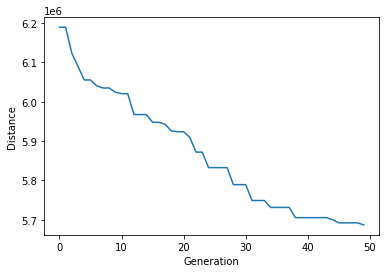

In [12]:
import matplotlib.pyplot as plt
import bisect
def reverse(l):
    return float(1) / float(l)

def genentic(iterations, population_number, mutation_rate, elite_size):
    print("D")
    population = first_population(population_number, n)
    print("SS")
    progress = []
    for i in range(iterations):

            
        
        print(i,mutation_rate, fitness(population[0]), fitness(population[1]), end = '\r', flush=True)
        population.sort(key = fitness)
        progress.append(fitness(population[0]))
        child = []
        # moving elites to next generation
        for j in range(elite_size):
            child.append(population[j])
            
        # selection based on fitness(normalize fitness)
        select = []
        normalized_fitness = [(reverse(fitness(j))) for j in population]
        reversed(population)
        sum_fitness = sum(normalized_fitness)
        prefix_sum = [normalized_fitness[0]/sum_fitness]
        for k in range(1, len(population)):
            prefix_sum.append(prefix_sum[k-1] + float(normalized_fitness[k]) / float(sum_fitness))
            
        while(len(select) < population_number - elite_size):
            x = random.random() 
            select.append(population[bisect.bisect(prefix_sum, x)])
        
        # making new child from selected parents
        j = 0
        population.sort(key = fitness)
        while (len(child) < population_number):
            child.append(cross_over(select[j], select[len(select) - 1 - j]))
            j = (j + 1) % len(select)
        # mutate next generation
        for j in range(elite_size, population_number):
            if (random.random() < mutation_rate):
                child[j] = mutation(child[j], mutation_rate)
        population = child
    
    population.sort(key = fitness)
    print(population[0], fitness(population[0]))
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    
genentic(500, 100, 0.001, 20)

[597, 249, 583, 162, 582, 221, 458, 427, 413, 816, 559, 506, 481, 507, 827, 786, 210, 467, 468, 261, 258, 273, 282, 309, 310, 83, 42, 302, 354, 289, 313, 29, 70, 388, 673, 988, 721, 747, 914, 920, 934, 999, 782, 411, 391, 263, 178, 215, 497, 587, 230, 490, 548, 781, 813, 452, 635, 939, 963, 879, 931, 785, 619, 756, 933, 880, 869, 861, 915, 849, 854, 860, 873, 898, 793, 743, 749, 787, 877, 896, 802, 549, 614, 445, 435, 584, 911, 872, 900, 950, 717, 768, 940, 903, 897, 891, 777, 899, 865, 924, 878, 832, 799, 763, 766, 790, 758, 930, 937, 698, 784, 760, 909, 484, 92, 71, 341, 20, 11, 63, 67, 117, 116, 409, 114, 576, 594, 858, 844, 838, 902, 971, 684, 695, 961, 730, 746, 752, 1000, 997, 457, 499, 538, 531, 479, 489, 224, 265, 995, 156, 159, 272, 146, 260, 183, 188, 173, 255, 54, 26, 17, 332, 47, 39, 24, 58, 40, 50, 315, 165, 245, 163, 147, 118, 101, 73, 204, 242, 496, 449, 438, 420, 377, 390, 620, 941, 862, 491, 510, 524, 894, 867, 923, 840, 213, 254, 168, 145, 140, 167, 179, 225, 207, 248

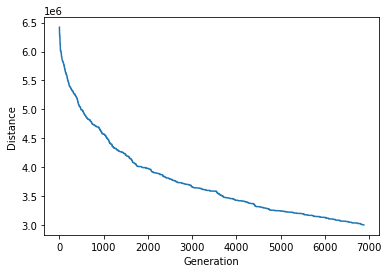

In [20]:
import matplotlib.pyplot as plt
import bisect
def reverse(l):
    return float(1) / float(l)

def genentic(iterations, population_number, mutation_rate, elite_size):
    population = first_population(population_number, n)
    progress = []
    stop = True
    stop_cnt = 0
    best = 3000000
    pre = 100000000
    i = 0
    while stop:
        
        if best < 3000*1000:
            stop = False
            
        population.sort(key = fitness)
        best = fitness(population[0])
        
        if (i%100 == 0):
            print(i,mutation_rate, best, fitness(population[1]), end = '\r', flush=True)
        i += 1
        
        progress.append(best)

        child = []
        # moving elites to next generation
        for j in range(elite_size):
            child.append(population[j])
            
        # selection based on fitness(normalize fitness)
        select = []
        normalized_fitness = [(reverse(fitness(j))) for j in population]
        reversed(population)
        sum_fitness = sum(normalized_fitness)
        prefix_sum = [normalized_fitness[0]/sum_fitness]
        for k in range(1, len(population)):
            prefix_sum.append(prefix_sum[k-1] + float(normalized_fitness[k]) / float(sum_fitness))
            
        while(len(select) < population_number - elite_size):
            x = random.random() 
            select.append(population[bisect.bisect(prefix_sum, x)])
        
        # making new child from selected parents
        j = 0
        population.sort(key = fitness)
        while (len(child) < population_number):
            child.append(cross_over(select[j], select[len(select) - 1 - j]))
            j = (j + 1) % len(select)
        # mutate next generation
        for j in range(elite_size, population_number):
            if (random.random() < mutation_rate):
                child[j] = mutation(child[j], mutation_rate)
        population = child
    
    population.sort(key = fitness)
    print(population[0], fitness(population[0]))
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    
genentic(500, 10, 0.001, 2)